In [19]:
# Install if not already available (run once)
# % pip install nltk newspaper3k beautifulsoup4 requests --quiet

In [20]:
# Imports
import nltk
import requests
from bs4 import BeautifulSoup
from newspaper import Article
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from time import sleep
import warnings
warnings.filterwarnings('ignore')

# Sentiment Analysis

In [21]:
# Download NLTK VADER lexicon
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MP_Laptop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Keyword selection  +  Sentiment Classification Logic

In [22]:
# Keyword lists
buy_keywords = ['buy', 'bullish', 'rally', 'upside', 'invest', 'long']
sell_keywords = ['sell', 'bearish', 'crash', 'overvalued', 'dump', 'short']
hold_keywords = ['hold', 'wait', 'stable', 'uncertain', 'pause']

def classify_sentiment(text, compound_score):
    text_lower = text.lower()
    
    if compound_score >= 0.3:
        if any(word in text_lower for word in buy_keywords):
            return 'buy'
        elif any(word in text_lower for word in hold_keywords):
            return 'hold'
        else:
            return 'buy'
    elif compound_score <= -0.3:
        if any(word in text_lower for word in sell_keywords):
            return 'sell'
        else:
            return 'sell'
    elif any(word in text_lower for word in hold_keywords):
        return 'hold'
    else:
        return 'neutral'

Collection of articles

In [23]:
search_url = "https://u.today/search/node?keys=Bitcoin"
response = requests.get(search_url)
soup = BeautifulSoup(response.text, 'html.parser')



# Extract article titles, dates, authors, and links
articles = soup.find_all('div', class_='news__item')
data = []
seen = set()
for article in articles:
    # Link
    link_tag = article.find('a', class_='news__item-body')
    link = link_tag['href'] if link_tag and link_tag.has_attr('href') else 'No Link'

    # Use (title, date, author, link) as a unique identifier
    identifier = (link)
    if identifier not in seen:
        data.append({
            'Link': link
        })
        seen.add(identifier)





# Process each article link
print(f"Found {len(data)} article links.")

Found 58 article links.


Classification of articles according sentiment analysis + keywords

In [24]:
results = {'buy': 0, 'hold': 0, 'sell': 0, 'neutral': 0}
article_data = []

# Limit number for demo (can remove data[:10] to get all)
for item in data:
    try:
        url = item['Link']  # Extract the URL string from the dict
        article = Article(url)
        article.download()
        article.parse()
        text = article.text

        if len(text) < 200:
            continue

        score = sia.polarity_scores(text)['compound']
        sentiment = classify_sentiment(text, score)
        results[sentiment] += 1

        article_data.append({
            'title': article.title,
            'url': url,
            'sentiment': sentiment
        })

        print(f"[{sentiment.upper()}] {article.title}")
        sleep(1)  # Be nice to the site

    except Exception as e:
        print(f"Error with {url}: {e}")

[BUY] Legendary Trader John Bollinger Drops Crucial Bitcoin Price Update
[SELL] Michael Saylor Reacts to Bitcoin's Recovery With Sudden Tweet
[BUY] Biggest Bitcoin Bloodbath in History of Binance Just Happened
[HOLD] Coinbase to Let You Earn Bitcoin with New Amex Card
[SELL] Ripple CEO Changes His Tune on Dogecoin, Shiba Inu (SHIB) Loses 92%, Strategy’s Bitcoin STRD Launches on Nasdaq: Crypto News Digest by U.Today
[BUY] Schiff Sounds 'Complete Fraud' Alarm for Saylor's $62 Billion Bitcoin Strategy
[SELL] Bitcoin Sees Abnormal 2,360% Liquidation Imbalance in Just One Hour
[NEUTRAL] Bitcoin (BTC) Price Prediction for June 12
[BUY] Michael Saylor Stuns Community With Bitcoin Validation Statement
[BUY] Satoshi Nakamoto's 16-Year Bitcoin Holdings Now Worth $118 Billion
[BUY] Bitcoin (BTC) to Crash to $90,000? Price Falls
[BUY] Bitcoin Bull Novogratz Says Strategy Copycats Are Getting 'Overhyped'
[BUY] BlackRock's Bitcoin ETF Breaks Into Top 20
[BUY] Solana (SOL) Golden Cross Secured? Shiba

check : [SELL] 'Buy Bitcoin': Musk's $5 Trillion Debt Warning Seen as BTC Endorsement


In [25]:
print("\n--- Final Sentiment Classification ---")
for category, count in results.items():
    print(f"{category.title()}: {count} articles")


--- Final Sentiment Classification ---
Buy: 48 articles
Hold: 1 articles
Sell: 8 articles
Neutral: 1 articles


In [26]:
import pandas as pd

df = pd.DataFrame(article_data)
df

,title,url,sentiment
0,Legendary Trader John Bollinger Drops Crucial ...,https://u.today/legendary-trader-john-bollinge...,buy
1,Michael Saylor Reacts to Bitcoin's Recovery Wi...,https://u.today/michael-saylor-reacts-to-bitco...,sell
2,Biggest Bitcoin Bloodbath in History of Binanc...,https://u.today/biggest-bitcoin-bloodbath-in-h...,buy
3,Coinbase to Let You Earn Bitcoin with New Amex...,https://u.today/coinbase-to-let-you-earn-bitco...,hold
4,"Ripple CEO Changes His Tune on Dogecoin, Shiba...",https://u.today/ripple-ceo-changes-his-tune-on...,sell
5,Schiff Sounds 'Complete Fraud' Alarm for Saylo...,https://u.today/schiff-sounds-complete-fraud-a...,buy
6,"Bitcoin Sees Abnormal 2,360% Liquidation Imbal...",https://u.today/bitcoin-sees-abnormal-2360-liq...,sell
7,Bitcoin (BTC) Price Prediction for June 12,https://u.today/bitcoin-btc-price-prediction-f...,neutral
8,Michael Saylor Stuns Community With Bitcoin Va...,https://u.today/michael-saylor-stuns-community...,buy
9,Satoshi Nakamoto's 16-Year Bitcoin Holdings No...,https://u.today/satoshi-nakamotos-16-year-bitc...,buy


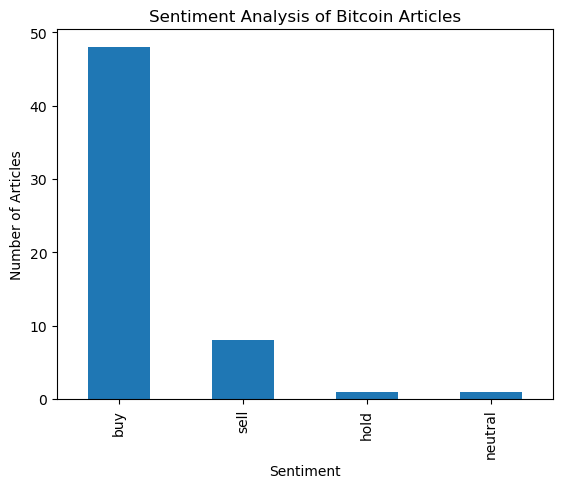

In [27]:
# Bar chart of sentiment counts
df['sentiment'].value_counts().plot(kind='bar', title='Sentiment Analysis of Bitcoin Articles')
import matplotlib.pyplot as plt
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()